PCA ma sens jeśli dane są najprawdę wysoko wymiarowe tzn. mają przynajmniej 100 atrybutów. Przykładem takich danych są dane obrazkowe. Wymiar danych to szerokość razy wysokość obrazka a wartość danego atrybutu to intensywność koloru danego piksela.

Spróbujemy użyć PCA na bazie danych MNIST zawierającej obrazki ręcznie pisanych cyferek. Będziemy zarówno wizualizować efekty redukcji jak i użwać redukcji do klasyfikacji.

Najpierw pobierzmy dane i przyjrzyjmy się im to znaczy:

-ile mają wymiarów

-jaka jest ich ilość

-jaki jest zakres wartości pikseli

-ile jest klas

Uwaga: Jeśli dane się nie pobierają, to pobieramy plik z https://github.com/amplab/datascience-sp14/blob/master/lab7/mldata/mnist-original.mat i wrzucamy do katalogu "~/scikit_learn_data/mldata" (katalog uzytkownika).

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')
X = mnist.data.astype('float64')
y = mnist.target
print(X.shape, " ", y.shape)



(70000, 784)   (70000,)


In [5]:
print(X.min(), X.max(), X.mean())



0.0 255.0 33.385964741253645


In [6]:
print(X[0,:])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.  51. 159. 253. 159.  50.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  48. 238. 252. 252. 252. 237.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  54.
 227. 253. 252. 239. 233. 252.  57.   6.   0.   0.   0.   0.   0.   0.
   0. 

In [7]:
np.unique(y)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

Spróbujmy zobaczyć obrazek. W tym celu używamy metody "imshow" klasy "plot" - jako argument wrzucamy 2-wymiarowy numpy array.

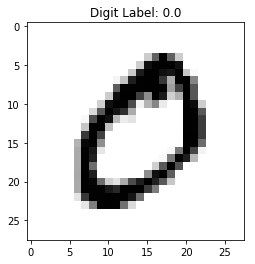

In [8]:
def printImage(image, label):
    # 784 columns correspond to 28x28 image
    plottable_image = np.reshape(image, (28, 28))

    # Plot the image
    plt.imshow(plottable_image, cmap='gray_r')
    plt.title('Digit Label: {}'.format(label))
    plt.show()

# First row is first image
printImage(X[0,:], y[0])

Proszę wypisać po jednej przykładowej cyferce z każdej z klas.

Proszę zobrazowac poszczególne klasy w 2 wymiarach (PCA)

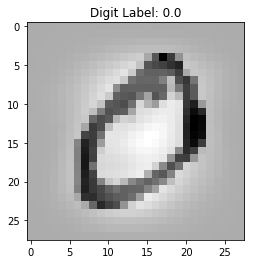

In [60]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

printImage(X[0,:], y[0])

In [10]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(2)

In [11]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
print(pca.n_components_)


2


In [13]:
X_pca = pca.transform(X)

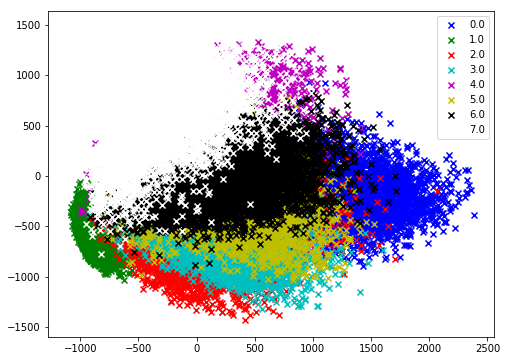

In [14]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
fig = plt.figure(figsize=(8,6))
for i in range(8):
    plt.scatter(X_pca[np.where(y == i*1.0)[0], 0], X_pca[np.where(y == i*1.0)[0], 1], marker='x', color=colors[i], label=i*1.0)
plt.legend(loc='upper right')
plt.show(fig);

Spróbujmy zobaczyć co dla obrazków znaczą wektory własne. Są to obrazki. Zatem narysujmy 50 widących wektorów własnych.

In [15]:
pca = PCA(0.95)
X_pca = pca.fit_transform(X)

C:\Users\marek\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


<Figure size 432x288 with 0 Axes>

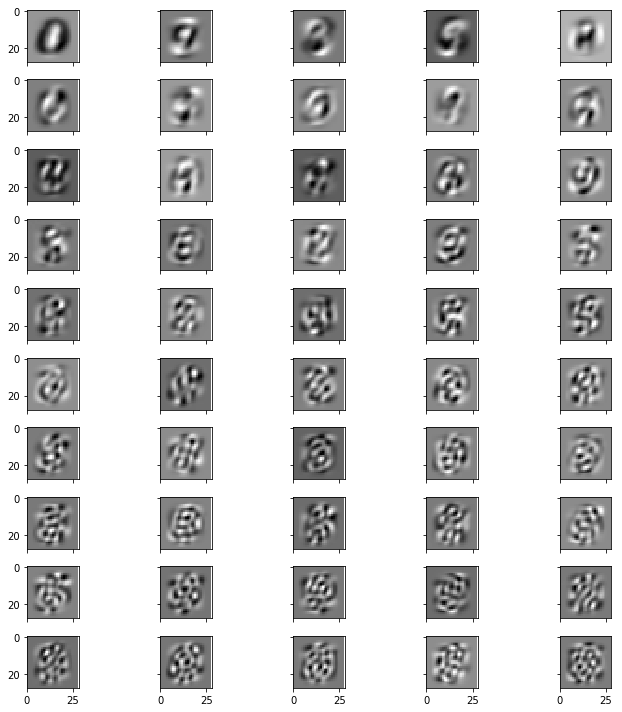

In [16]:
plt.clf()
plt.style.use('seaborn-muted')

fig, axes = plt.subplots(10,5, figsize=(10,10),
                         sharex=True, sharey=True,
                         subplot_kw=dict(adjustable='box-forced', aspect='equal'))

images_to_plot = 50
for i in range(images_to_plot):
    
    # axes (subplot) objects are stored in 2d array, accessed with axes[row,col]
    subplot_row = i//5
    subplot_col = i%5  
    ax = axes[subplot_row, subplot_col]

    # plot image on subplot
    plottable_image = np.reshape(pca.components_[i,:], (28,28))
    ax.imshow(plottable_image, cmap='gray_r')
    
    ax.set_xbound([0,28])

plt.tight_layout()
plt.show()

Pierszy komponent opisuje najbardziej charakterystytczny wektor (kierunek). Jest to najbardziej charakterystyczny (średni) obrazek ze wszystkich. Kolejne opisuja większe zmienności.



Chcemy przetestować szybkość i jakość klasyfikacji w zależności od ilość wyjaśnianej wariancji. Dla wyjaśnianiej wariancji 0.85, 0.9, 0.95, 0.96, 0.99, 1.0 raportujemy: ilość komponentów, szybkość uczenia, szybkość klasyfikacji, dokładność klasyfikacji.



In [32]:
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7.0, random_state=0)

In [36]:
pca = PCA(0.95)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_pca = pca.transform(X)

ZADANIE: Poszukać zbioru twarzy i zobaczyć co kryje się pod wektorami własnymi twarzy.